<a href="https://colab.research.google.com/github/rohan-jagtap04/Machine-Learning/blob/main/Number_Classification_w_Tensorflow_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist #28x28 images of handwritten digits from 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # softmax for probability distribution

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5167 - accuracy: 0.8647
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1509 - accuracy: 0.9550
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9703
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0780 - accuracy: 0.9773
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0558 - accuracy: 0.9840
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9873
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9901
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9928
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0224 - accuracy: 0.9940
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [104]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.9753
0.13500241935253143 0.9753000140190125


In [110]:
model.save('Number_Classifier.model')

INFO:tensorflow:Assets written to: Number_Classifier.model/assets


In [111]:
new_model = tf.keras.models.load_model('Number_Classifier.model')

In [112]:
def prepare(filepath):
  IMG_SIZE = 28
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(1, IMG_SIZE, IMG_SIZE, -1)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


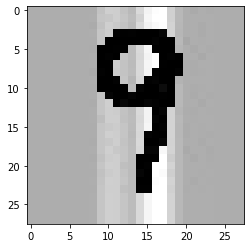

In [114]:
predictions = new_model.predict([prepare('Number_Classifier.model/nine.jpg')])
print(predictions)
image = prepare('Number_Classifier.model/nine.jpg')
image = tf.keras.utils.normalize(image, axis=1).squeeze()
plt.imshow(image, cmap='gray')
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


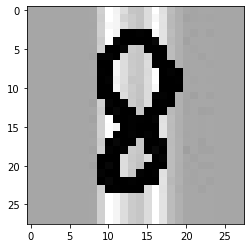

In [115]:
predictions = new_model.predict([prepare('Number_Classifier.model/eight.jpg')])
print(predictions)
image = prepare('Number_Classifier.model/eight.jpg')
image = tf.keras.utils.normalize(image, axis=1).squeeze()
plt.imshow(image, cmap='gray')
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


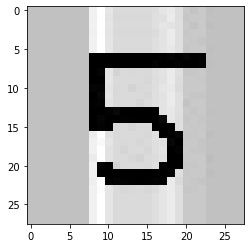

In [116]:
predictions = new_model.predict([prepare('Number_Classifier.model/five.jpg')])
print(predictions)
image = prepare('Number_Classifier.model/five.jpg')
image = tf.keras.utils.normalize(image, axis=1).squeeze()
plt.imshow(image, cmap='gray')
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


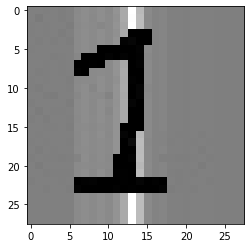

In [117]:
predictions = new_model.predict([prepare('Number_Classifier.model/one.jpg')])
print(predictions)
image = prepare('Number_Classifier.model/one.jpg')
image = tf.keras.utils.normalize(image, axis=1).squeeze()
plt.imshow(image, cmap='gray')
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


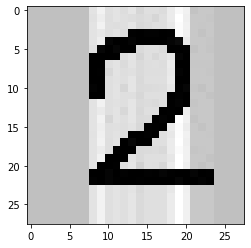

In [118]:
predictions = new_model.predict([prepare('Number_Classifier.model/two.jpg')])
print(predictions)
image = prepare('Number_Classifier.model/two.jpg')
image = tf.keras.utils.normalize(image, axis=1).squeeze()
plt.imshow(image, cmap='gray')
plt.show()